In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# P 5.1 

delivered on paper

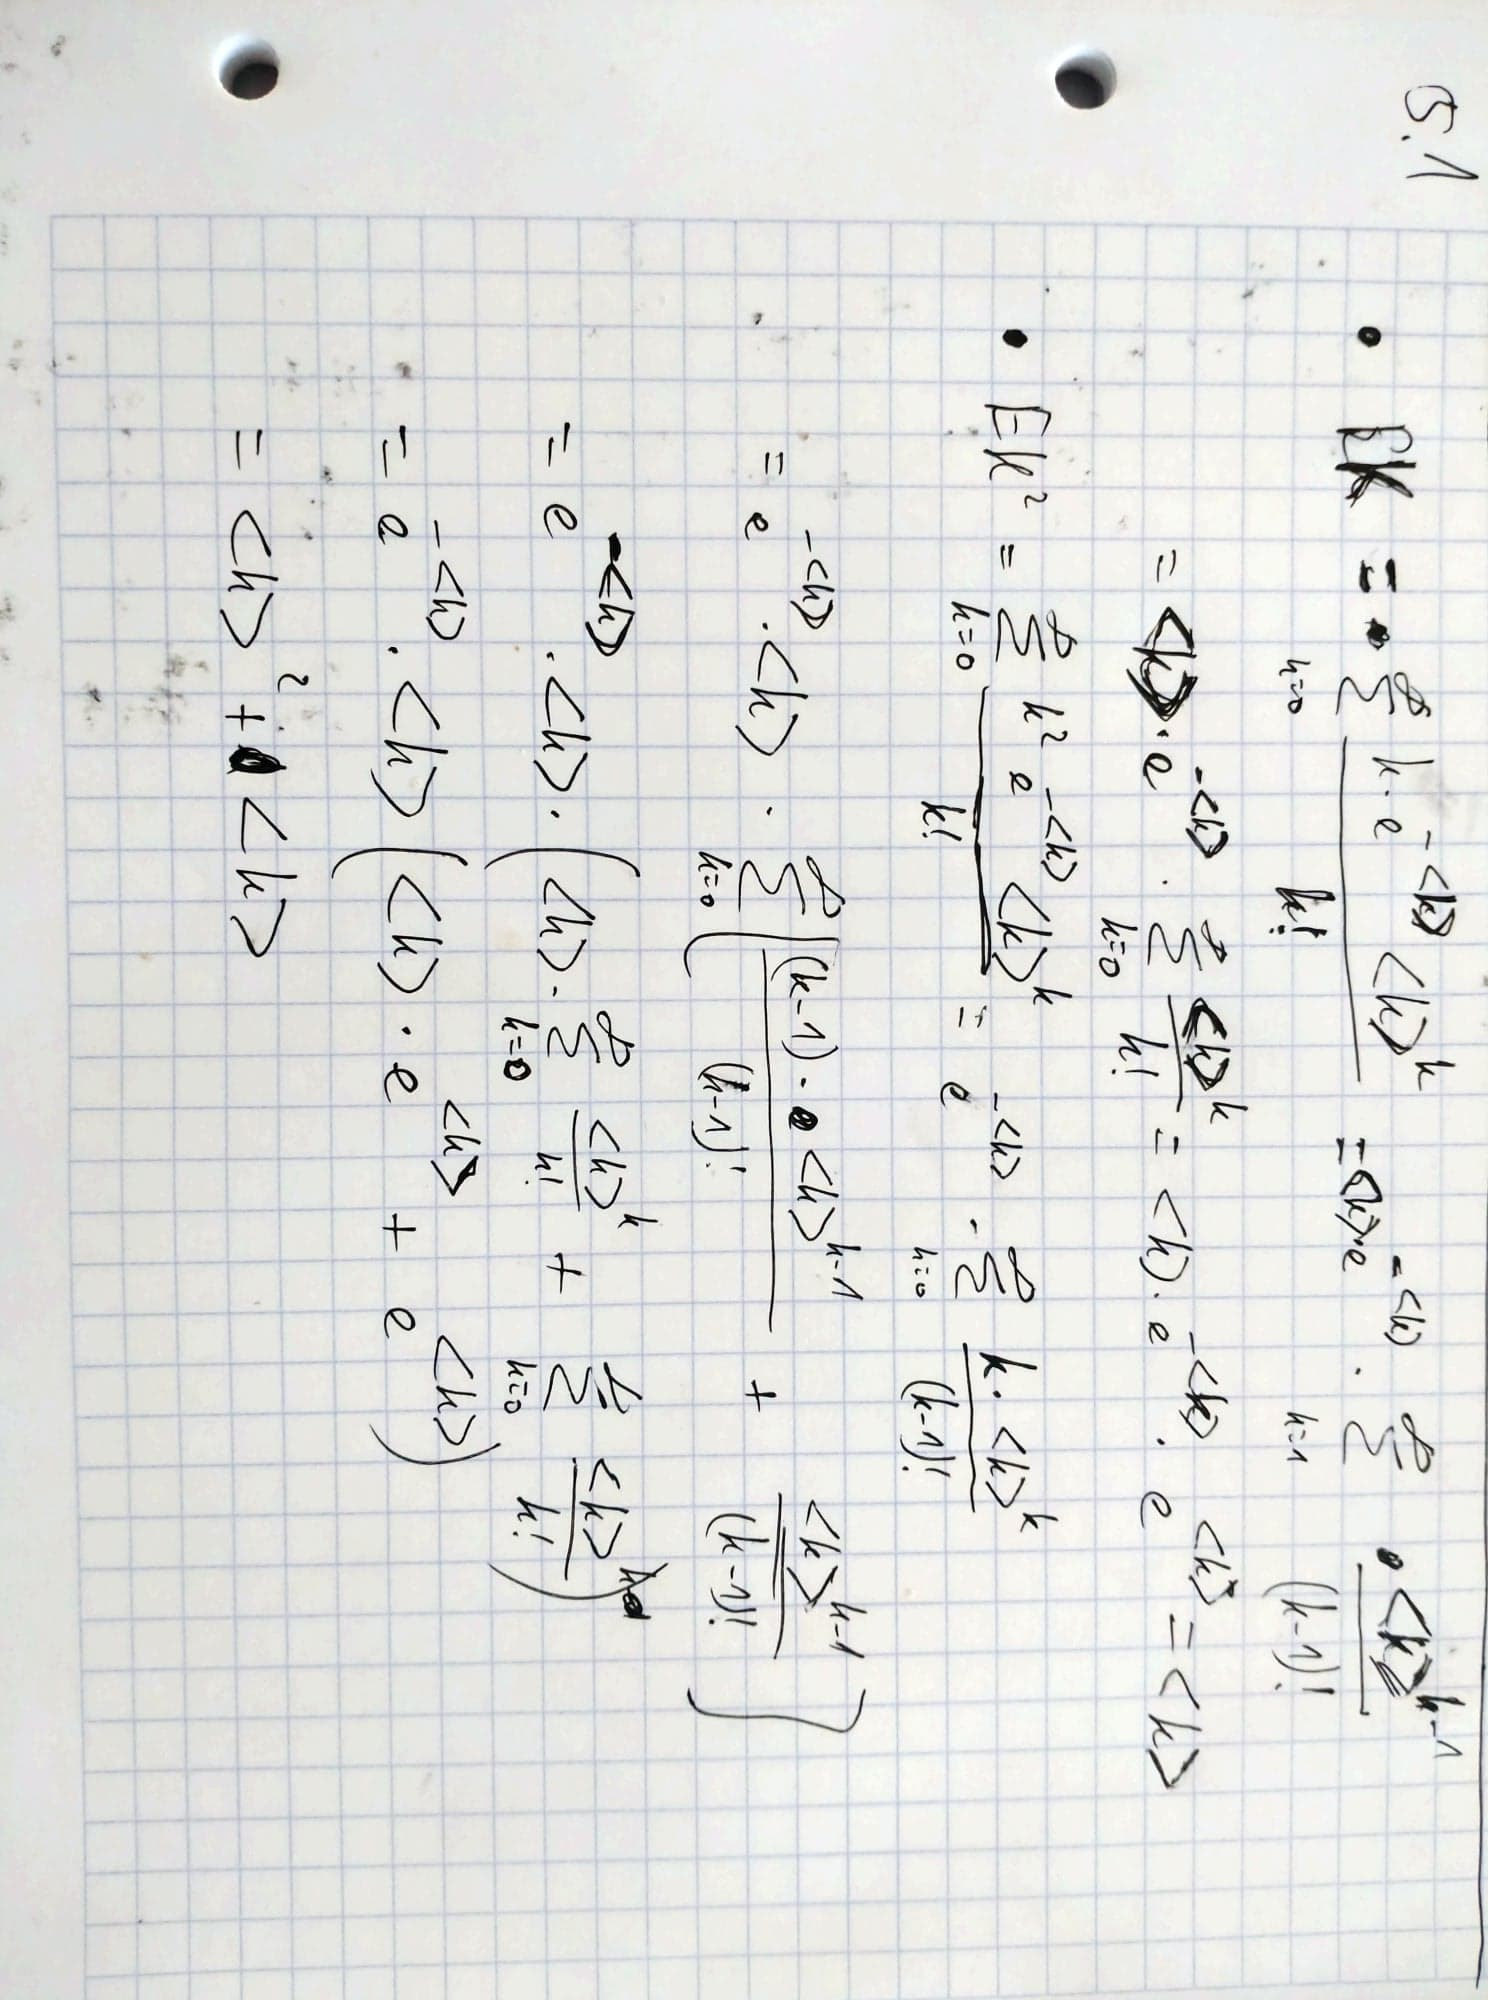

In [85]:
from IPython.display import Image
Image(filename='ex5_1.jpg')

# P 5.2

\<C> = p. Check by simulation

[Text(0.5, 1.0, 'Clustering coefficient  vs. probability p (ER graphs)')]

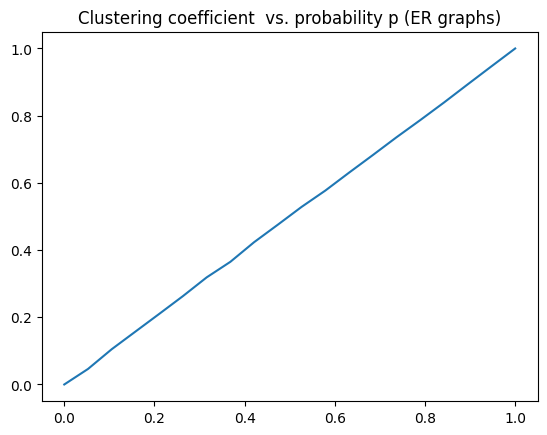

In [120]:
N = 100
# For probability p, creates M Erdos Renyi graphs and calculates the average of their average clustering coefficent
# performs a simulation M times
def clustCoefER(p: float, M = 20) -> float:
    summ = 0
    for _ in range(M):
        G = nx.generators.erdos_renyi_graph(N, p)
        summ += nx.average_clustering(G)
    return summ/M

X = np.linspace(0, 1, 20)
Y = np.array([clustCoefER(p) for p in X])
sns.lineplot(x = X, y = Y).set(title = "Clustering coefficient  vs. probability p (ER graphs)")

The dependence is almost linear

# P 5.3



In [108]:
N=20 
N_OF_COMMUNITIES=4
communities = [np.random.rand(N, N) for _ in range(N_OF_COMMUNITIES)] # 'N_OF_COMMUNITIES' matrices filled with U[0,1]
separate = np.ones((N*N_OF_COMMUNITIES, N*N_OF_COMMUNITIES)) * 0.01 # matrix with values of 0.01 (separate communities' linking)
for i in range(N_OF_COMMUNITIES):
    separate[i*N:(i+1)*N, i*N:(i+1)*N] = communities[i]
# to make the matrix symmetric
prob_matrix = (separate + separate.transpose())/2
np.fill_diagonal(prob_matrix, 0)

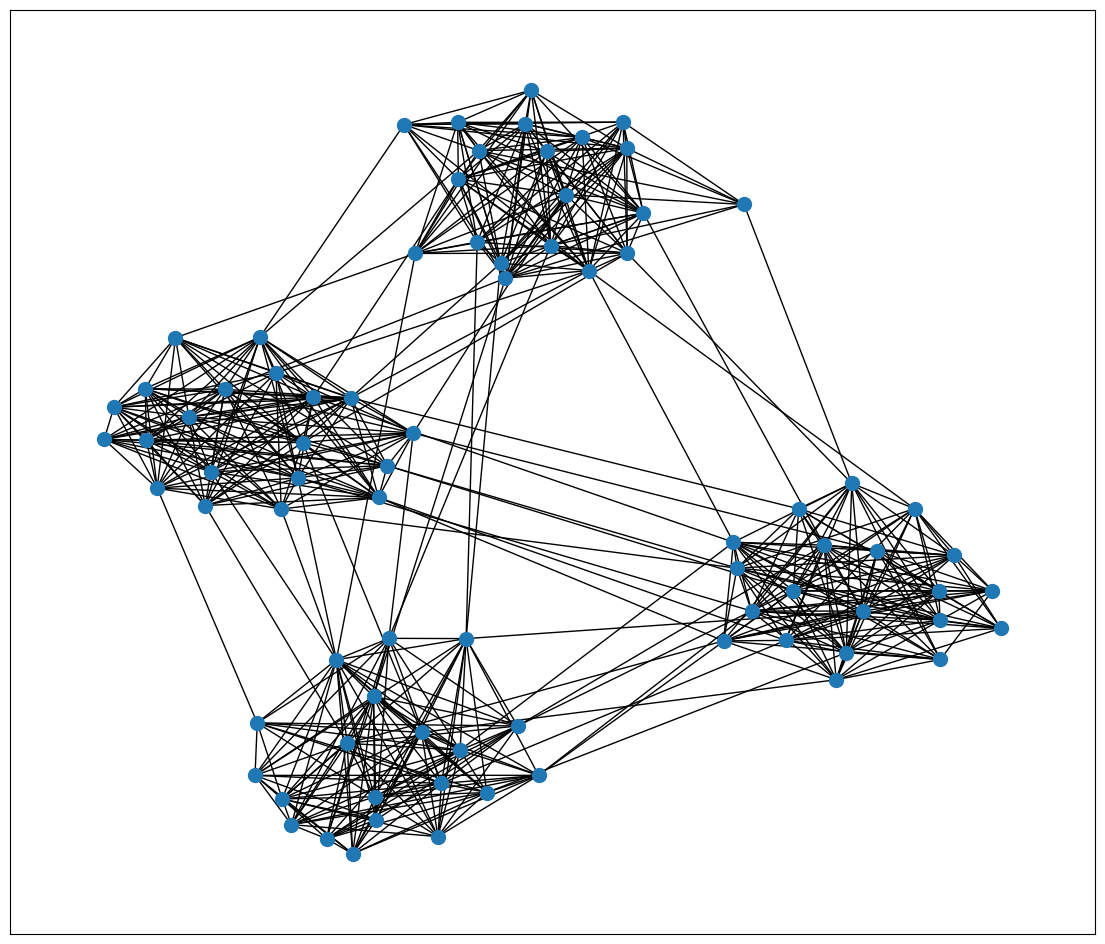

In [109]:
adj_matrix = prob_matrix > np.random.rand(N*N_OF_COMMUNITIES, N*N_OF_COMMUNITIES)  
G = nx.convert_matrix.from_numpy_array(adj_matrix)
nx.draw_networkx(G, nx.spring_layout(G), with_labels=False, node_size=100,ax=plt.subplots(figsize=(14,12))[1])


# P 5.4

[Text(0.5, 1.0, 'Averaged coefficient of clustering  vs. probability p')]

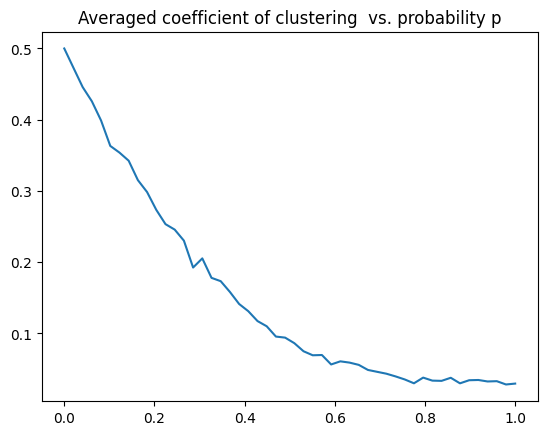

In [121]:
N = 100
# For probabilty p, creates M Watts Strogatz graphs and calculates the average of their clustering coefficent
# performs a simulation M times
def avClustCoefWS(p: float, M = 20, k = 5) -> float:
    summ = 0
    for _ in range(M):
        G = nx.generators.random_graphs.connected_watts_strogatz_graph(N, k, p)
        summ += nx.average_clustering(G)
    return summ/M

X = np.linspace(0, 1, 50)
Y = [avClustCoefWS(p) for p in X]
sns.lineplot(x = X, y = Y).set(title = "Averaged coefficient of clustering  vs. probability p")


# Exercices 1-8



### Ex.2


Implement a function that returns the adjacency matrix of one
realization of the ER graph with given values of N and p. Watch out
for the trap!

In [4]:

def adj_matrix(p: float, N = 10):
    G = nx.generators.erdos_renyi_graph(N, p)
    A = np.zeros((N,N))

    for u in G.edges(data = True):
#         print(u[0], u[1])

        A[u[0], u[1]] = 1
        A[u[1], u[0]] = 1
    return A,G


In [10]:
A,G = adj_matrix(p = 0.4, N = 10)

In [46]:
A

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 1., 0., 1., 0.]])

### Ex.3

Draw resulting graph

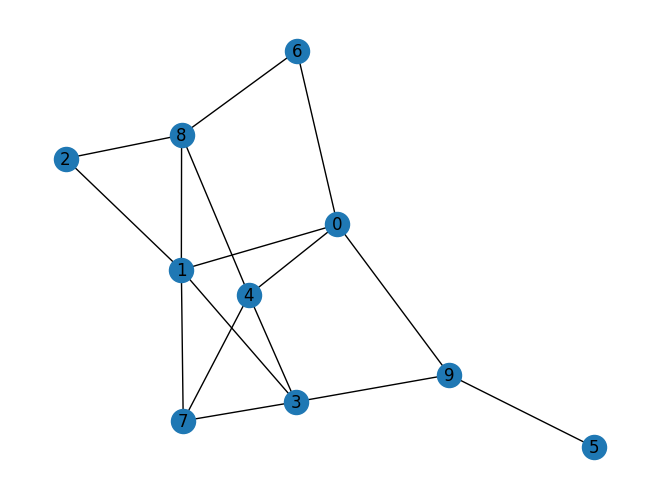

In [11]:
nx.draw(G, with_labels=True)

In [12]:
nx.adjacency_matrix(G).todense() # same result as A

C:\Users\Patryk\AppData\Local\Temp\ipykernel_24680\1136749110.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G).todense() # same result as A


matrix([[0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
        [1, 0, 1, 1, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
        [1, 0, 0, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 0]], dtype=int32)

### Ex.4

Draw histogram of degree distribution.

(array([1., 0., 2., 0., 0., 2., 0., 4., 0., 1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

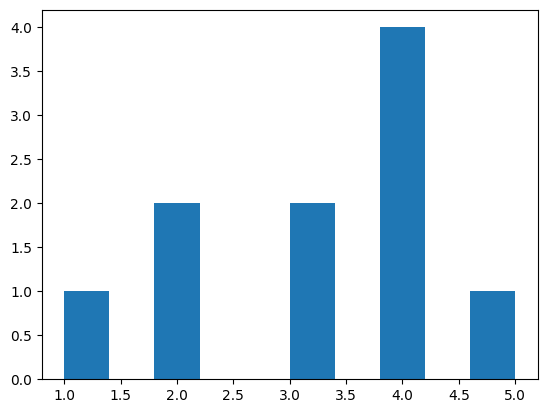

In [13]:
# A,G = adj_matrix(p = 0.4, N = 10)


X = list(dict(G.degree).values())
plt.hist(X)

(array([ 8.,  9., 20., 26., 33., 34., 37., 21., 10.,  2.]),
 array([44. , 47.1, 50.2, 53.3, 56.4, 59.5, 62.6, 65.7, 68.8, 71.9, 75. ]),
 <BarContainer object of 10 artists>)

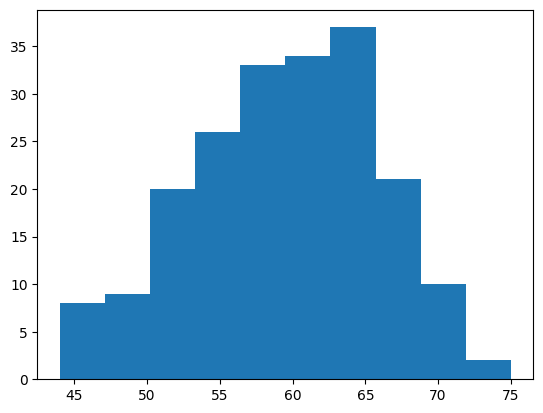

In [14]:
A,G = adj_matrix(p = 0.3, N = 200)


X = list(dict(G.degree).values())
plt.hist(X)

### Ex.5

What degree of vertex distribution do we expect?

Answer:  We expect **binomial** distribution, which for huge N and small p could be approximated by poissonian distribution. 



Then, ⟨ k⟩ ≈ Np  is a good poisson distribution parameter.

### Ex.6

Give the mathematical justification for the Poisson approximation
used.

It could be proven that while N tends to infinity, and lambda (or \<k>) = N*p, then the probability distribution tends to poisson probability distribution. 


Proof for example here: http://mathcenter.oxford.emory.edu/site/math117/connectingPoissonAndBinomial/ 

### Ex.7

Plot both the simulation results and analytically obtained
distributions on one graph. Test appropriate hypotheses.

(array([  9.,  72., 257., 463., 508., 455., 156.,  62.,  14.,   4.]),
 array([ 6. ,  9.2, 12.4, 15.6, 18.8, 22. , 25.2, 28.4, 31.6, 34.8, 38. ]),
 <BarContainer object of 10 artists>)

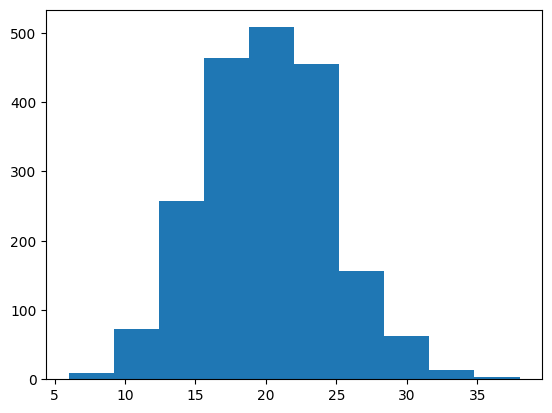

In [36]:
A,G = adj_matrix(p = 0.01, N = 2000)


X = list(dict(G.degree).values())
plt.hist(X)

C:\Users\Patryk\AppData\Local\Temp\ipykernel_24680\529204218.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample, kde=False, label = 'poisson', bins = np.linspace(0,35, num = 36))
C:\Users\Patryk\AppData\Local\Temp\ipykernel_24680\529204218.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

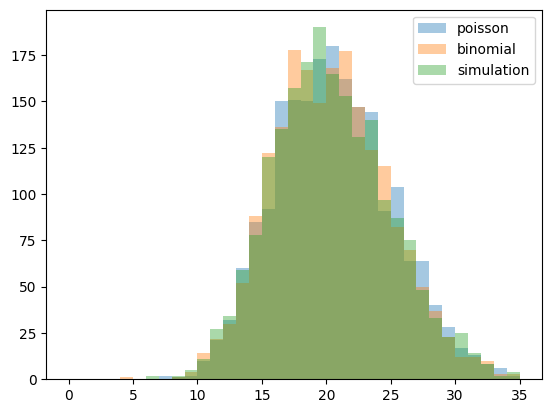

In [39]:
# Import poisson, matplotlib.pyplot, and seaborn
from scipy.stats import poisson
from scipy.stats import binom
import matplotlib.pyplot as plt 
import seaborn as sns

# Create the sample
sample = poisson.rvs(mu=20, size=2000, random_state=13)
sample2 = binom.rvs(p=0.01, n=2000, size = 2000, random_state=13)

# Plot the sample
sns.distplot(sample, kde=False, label = 'poisson', bins = np.linspace(0,35, num = 36))
sns.distplot(sample2, kde=False, label = 'binomial', bins = np.linspace(0,35, num = 36))
sns.distplot(X, kde=False, label = 'simulation', bins = np.linspace(0,35, num = 36))
plt.legend()
plt.show()

In [40]:
from scipy.stats import ks_2samp

In [ ]:
# hypotheeses tests

In [41]:
ks_2samp(X, sample, alternative='two-sided', method='auto')

# null hypothesis should not be rejected, degree distribution sample and poisson distribution sample have similar distributions 

KstestResult(statistic=0.031, pvalue=0.291764846534962)

In [43]:
ks_2samp(X, sample2, alternative='two-sided', method='auto')

# null hypothesis should not be rejected, degree distribution sample and binomial distribution sample have similar distributions 

KstestResult(statistic=0.0135, pvalue=0.9932816255401182)

In [45]:
res = ks_2samp(X, sample2, alternative='two-sided', method='auto')

In [47]:
res[1]

0.9932816255401182

### Ex.8

Check dependence of the results of the previous excercise for
various values of p and N.

### Dependence on N

In [81]:


p_values_binomial = []
p_values_poisson = []

Ns = np.array(np.linspace(10,2000, 100), dtype = int)
# ps = np.linspace(0.01, 0.50, 50)


p_ = 0.05

for N in Ns:
    _,G = adj_matrix(p = p_, N = N)
    X = list(dict(G.degree).values())
    # Create the samples
    sample = poisson.rvs(mu=p_*N, size=N, random_state=13)
    sample2 = binom.rvs(p=p_, n=N, size = N, random_state=13)
    p_values_binomial.append(ks_2samp(X, sample2, alternative='two-sided', method='auto')[1])
    p_values_poisson.append(ks_2samp(X, sample, alternative='two-sided', method='auto')[1])



[Text(0.5, 1.0, 'Dependence of p-value on N, p = 0.05 (binomial distr)')]

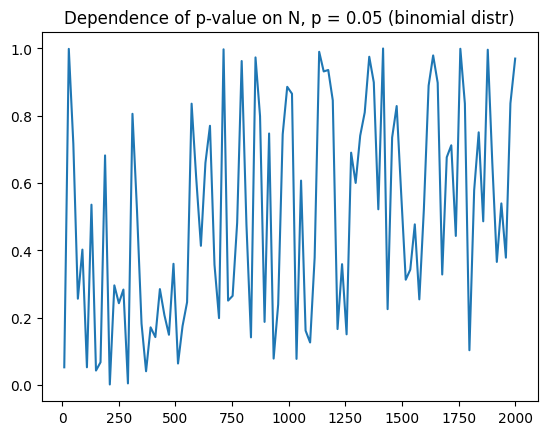

In [82]:
sns.lineplot(data=None,  x=Ns, y=p_values_binomial).set(title='Dependence of p-value on N, p = 0.05 (binomial distr)')

[Text(0.5, 1.0, 'Dependence of p-value on N, p = 0.05 (poisson distr)')]

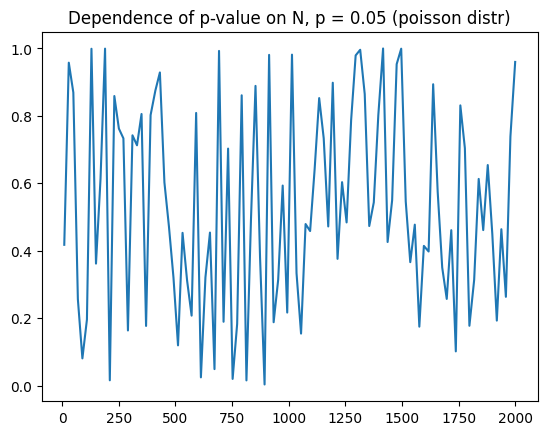

In [83]:
sns.lineplot(data=None,  x=Ns, y=p_values_poisson).set(title='Dependence of p-value on N, p = 0.05 (poisson distr)')

In both cases, p-value distribution seems to be uniform distribution on [0,1], that would imply that null hypotheses are true -- there is no significant difference between degree distribution and poisson or binomial sitributions.

### Dependence on p

In [77]:

p_values_binomial = []
p_values_poisson = []

# Ns = np.array(np.linspace(50,2000, 40), dtype = int)
ps = np.linspace(0.01, 0.70, 70)


N_ = 1000

for p in ps:
    _,G = adj_matrix(p = p, N = N_)
    X = list(dict(G.degree).values())
    # Create the samples
    sample = poisson.rvs(mu=p*N_, size=N_, random_state=13)
    sample2 = binom.rvs(p=p, n=N_, size = N_, random_state=13)
    p_values_binomial.append(ks_2samp(X, sample2, alternative='two-sided', method='auto')[1])
    p_values_poisson.append(ks_2samp(X, sample, alternative='two-sided', method='auto')[1])



[Text(0.5, 1.0, 'Dependence of p-value on p, N = 1000 (binomial distr)')]

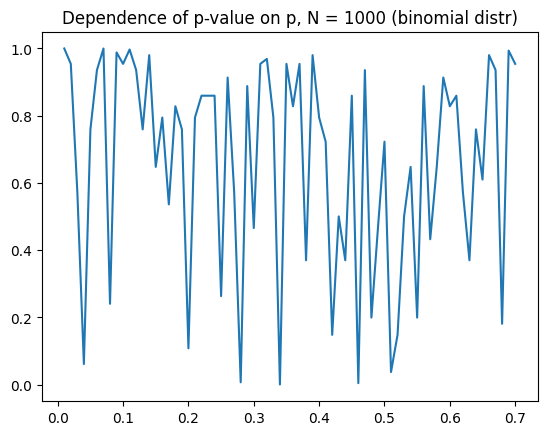

In [78]:
sns.lineplot(data=None,  x=ps, y=p_values_binomial).set(title='Dependence of p-value on p, N = 1000 (binomial distr)')

[Text(0.5, 1.0, 'Dependence of p-value on p, N = 1000 (poisson distr)')]

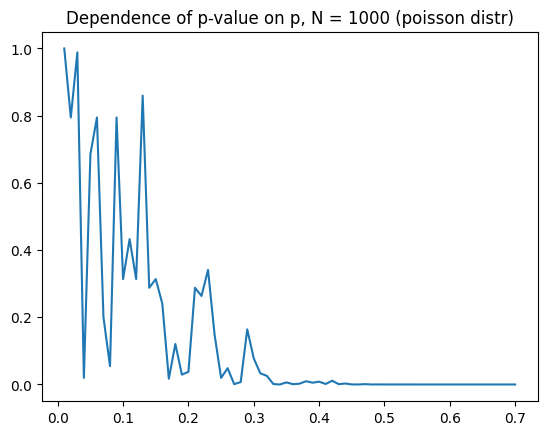

In [79]:
sns.lineplot(data=None,  x=ps, y=p_values_poisson).set(title='Dependence of p-value on p, N = 1000 (poisson distr)')

We can see that for high p ( higher than 0.3), poisson distribution is not valid for degree distribution. p-value becomes extremely low, which means we should reject null hypothesis ( there are significant differences between ditributions )

**Conclusion:** poisson approximation does not seem valid for values of probability p > 0.3 for $G_{n,p}$ model. The approximation is more robust to changes of N ( being sample size or vertices number)